#Chuẩn bị data và thư viện

In [168]:
!gdown --id 1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O
To: /content/House_Price_2.csv
100% 2.46k/2.46k [00:00<00:00, 3.79MB/s]


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("House_Price_2.csv")
df

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08
...,...,...,...
95,23,94,3.055955e+08
96,10,69,1.890808e+08
97,11,35,1.305380e+08
98,8,66,1.701948e+08


#Gradient Descent

In [171]:
X_1 = df['width'].values.reshape(-1, 1)
#X_1 = (X_1 - X_1.mean()) / (X_1.max() - X_1.min())
X_2 = df['length'].values.reshape(-1, 1)
#X_2 = (X_2 - X_2.mean()) / (X_2.max() - X_2.min())
X = np.concatenate([X_1, X_2], axis=-1)

y = df['price'].values.reshape(-1,1)
#y = (y - y.mean()) / (y.max() - y.min())

In [172]:
Z = np.concatenate([X, np.ones((X.shape[0],1))], axis=-1)
theta = np.asarray([[1.0], [100.0], [200.0]])     ## khởi tạo theta

n_iter = 100000           ## số vòng lặp cập nhật theta
lmda = 0.0002          ## learning rate
for ii in range(n_iter):
    error = y - np.matmul(Z, theta)
    theta =  theta - 2/Z.shape[0]*lmda*np.matmul(-Z.T, error)   ##cập nhật theta
    if ii % 10000 == 0:
        loss = np.mean(np.square(y - np.matmul(Z, theta)))
        print("Loss at iter {}: {}".format(ii, loss))
loss = np.mean(np.square(y - np.matmul(Z,theta)))

g_a, g_b, g_c = theta[0][0], theta[1][0], theta[2][0]
print()
print("Final loss: ", loss)
print("Final theta: ", theta)

Loss at iter 0: 2.5957024214521816e+16
Loss at iter 10000: 8651563415516.02
Loss at iter 20000: 8640171537638.343
Loss at iter 30000: 8634612798446.537
Loss at iter 40000: 8631900376338.975
Loss at iter 50000: 8630576832737.465
Loss at iter 60000: 8629931001227.607
Loss at iter 70000: 8629615863638.9375
Loss at iter 80000: 8629462090250.207
Loss at iter 90000: 8629387055548.15

Final loss:  8629350444392.164
Final theta:  [[4992889.31620091]
 [1997749.96472225]
 [ 825276.3552369 ]]


#So sánh kết quả

In [173]:
## Gradient Descent
print("a = {}, b = {}, c = {} | Gradient Descent".format(g_a, g_b, g_c))

## Exact Solution
T = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)
e_a, e_b, e_c = T[0][0], T[1][0], T[2][0]
print("a = {}, b = {}, c = {} | Exact Solution".format(e_a, e_b, e_c))

## SkLearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)                ## train LinearRegression 
sk_a, sk_b, sk_c = lr.coef_[0][0], lr.coef_[0][1], lr.intercept_[0]    ## lấy các tham số học được
print("a = {}, b = {}, c = {} | Sklearn".format(sk_a, sk_b, sk_c))

a = 4992889.316200909, b = 1997749.9647222508, c = 825276.3552369046 | Gradient Descent
a = 4992438.83485118, b = 1997577.0972277792, c = 844994.8258748334 | Exact Solution
a = 4992438.834851159, b = 1997577.097227781, c = 844994.8258749545 | Sklearn


In [174]:
print("GD MSE: ", np.mean(np.square(y - g_a*X_1 - g_b*X_2 - g_c)))
print("Exact SOl MSE: ", np.mean(np.square(y - e_a*X_1 - e_b*X_2 - e_c)))
print("SK MSE: ", np.mean(np.square(y - sk_a*X_1 - sk_b*X_2 - sk_c)))

GD MSE:  8629350444392.157
Exact SOl MSE:  8629315550589.733
SK MSE:  8629315550589.735


Nhận xét:
- Exact Solution và Sklearn có kết quả gần như giống nhau.
- Kết quả của Gradient Descent sẽ có sự chênh lệch nhiều hay ít tùy theo ***số lần lặp*** và ***learning rate*** mà ta chọn.

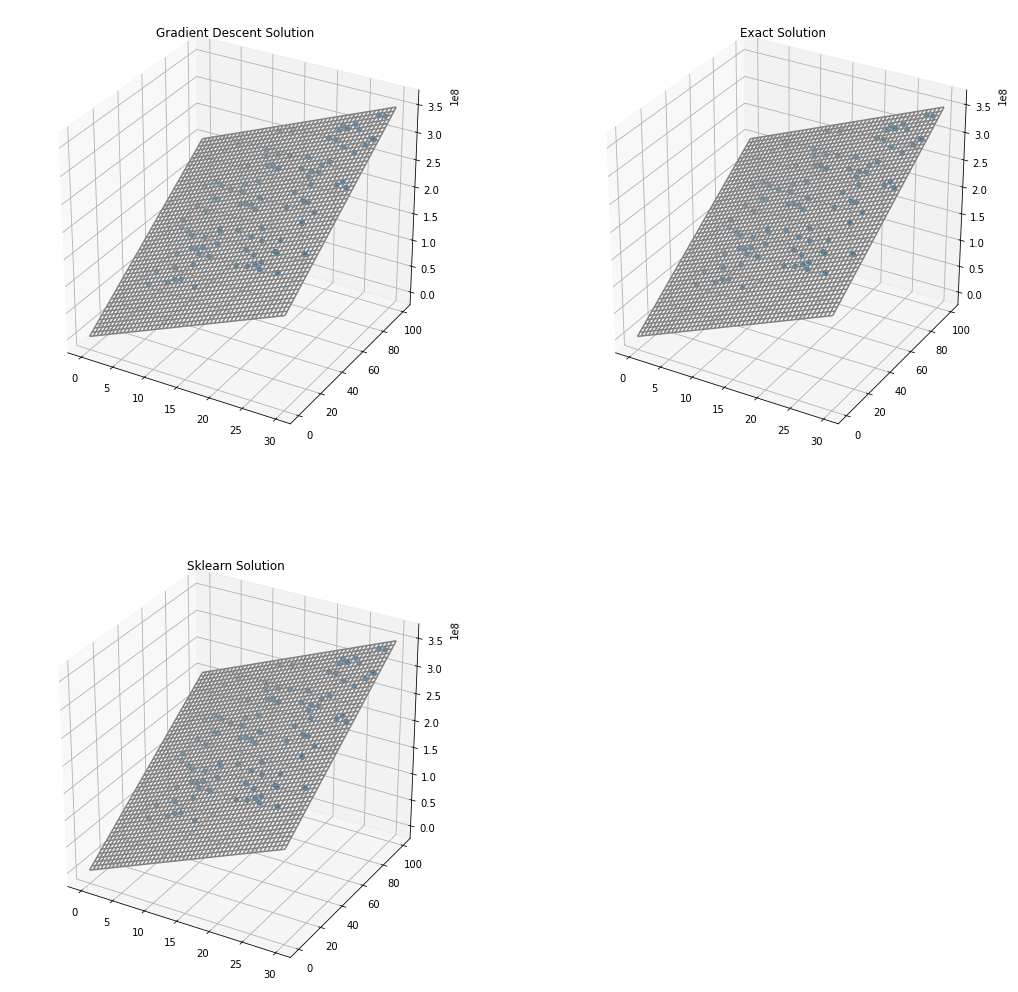

In [175]:
## Vẽ hình
fig = plt.figure(figsize=(18, 18))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(df["width"], df["length"], df["price"])
A, B = np.meshgrid(np.linspace(0,30), np.linspace(0,100))
gd_surface = g_a*A + g_b*B + g_c
ax.plot_wireframe(A, B, gd_surface, color = "gray")
ax.set_title("Gradient Descent Solution")

ax = fig.add_subplot(222, projection='3d')
ax.scatter(df["width"], df["length"], df["price"])
e_surface = e_a*A + e_b*B + e_c
ax.plot_wireframe(A, B, e_surface, color = "gray")
ax.set_title("Exact Solution")

ax = fig.add_subplot(223, projection='3d')
ax.scatter(df["width"], df["length"], df["price"])
sk_surface = sk_a*A + sk_b*B + sk_c
ax.plot_wireframe(A, B, sk_surface, color = "gray")
ax.set_title("Sklearn Solution")

plt.show()